In [1]:
import numpy as np 
from openbb_terminal.sdk import openbb
from arch import arch_model

In [2]:
# Setups Matplotlib with my settings
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (16,6))
plt.rc("savefig", dpi = 90)
plt.rc("font", family = "sans-serif")
plt.rc("font", size = 14)

In [3]:
# Streams requested Data
data = openbb.stocks.load("TLT", start_date = "2020-01-01", end_date = "2022-07-31")

Loading Daily data for TLT with starting period 2020-01-02.

In [5]:
# Computes the simple returns and multiply by 100 to avoid 
# the scaling warning from arch_model.
adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

In [6]:
#    Fits a GARCH model is one line of code.
model = arch_model(returns) 
#    Calling arch_model like this does three things:
#    Uses a constant mean
#    Assumes a GARCH(1, 0, 1) volatility model
#    Uses a normal distribution for the standardized errors


In [7]:
#   After you define the model, fit it.
res = model.fit()
#   The library uses an iterative algorithm called 
#   maximum likelihood estimation to fit the model parameters. 
#   Details of each iteration prints to the screen.

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6758246195.372123
Iteration:      2,   Func. Count:     14,   Neg. LLF: 923498874.4172271
Iteration:      3,   Func. Count:     21,   Neg. LLF: 183729109.60310063
Iteration:      4,   Func. Count:     27,   Neg. LLF: 930.5099142882664
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1859.28318047893
Iteration:      6,   Func. Count:     39,   Neg. LLF: 924.4403007245578
Iteration:      7,   Func. Count:     45,   Neg. LLF: 916.116990197965
Iteration:      8,   Func. Count:     51,   Neg. LLF: 916.0153286747395
Iteration:      9,   Func. Count:     57,   Neg. LLF: 915.9998761587218
Iteration:     10,   Func. Count:     62,   Neg. LLF: 915.9998501991447
Iteration:     11,   Func. Count:     66,   Neg. LLF: 915.9998501994602
Optimization terminated successfully    (Exit mode 0)
            Current function value: 915.9998501991447
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations: 11


In [8]:
#   Prints the summary to check model fit.
print(res.summary())
#   It shows the statistical significance of each of the coefficients. 
#   If they all have very small p-values, we can assume the results are 
#   not due to random chance.

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -916.000
Distribution:                  Normal   AIC:                           1840.00
Method:            Maximum Likelihood   BIC:                           1857.90
                                        No. Observations:                  648
Date:                Sun, Aug 20 2023   Df Residuals:                      647
Time:                        04:00:19   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.2763e-03  3.535e-02     -0.262      0.

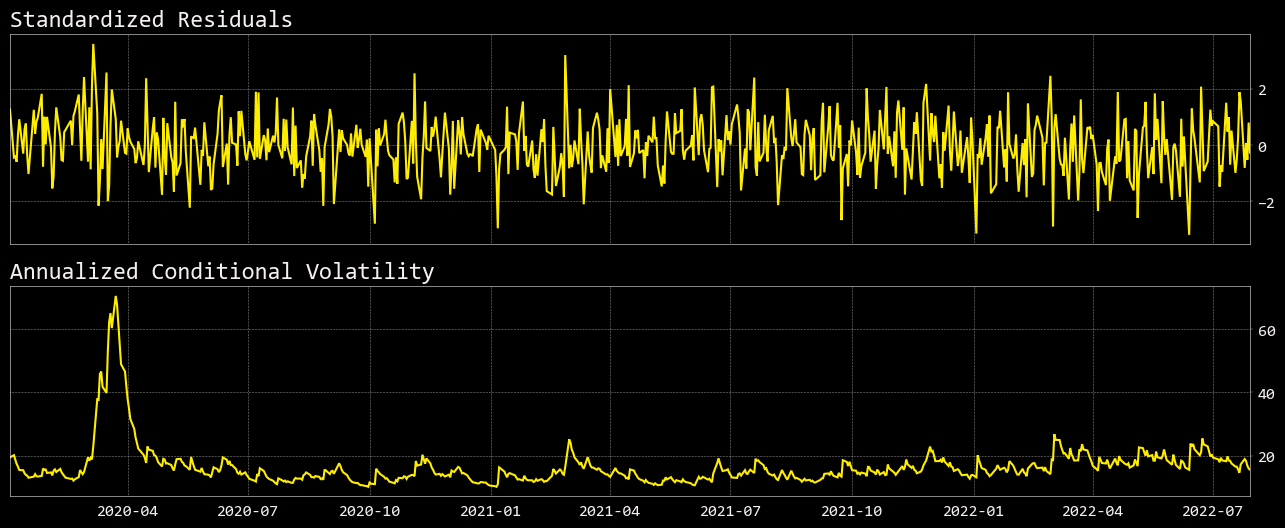

In [9]:
# Visualy plots the standardized residuals and conditional volatility.
fig = res.plot("D")
# Controls the number of forecasts with the horizon argument. 
# I use the first forecast in this example.

In [10]:
#Get the variance forecast
forecast = res.forecast(horizon = 1, reindex = False)
variance_forecast = forecast.variance.iloc[-1][0]

In [12]:
# Computes the Annualized Volatility Forecast
volatility_forecast = np.sqrt(variance_forecast)
annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100
annualized_volatility_forecast

0.14593303276380362

In [13]:
# Calculates the Annual Volatility of the Standard Deviation
annualized_volatility_stdev = returns.std() * np.sqrt(252) / 100
annualized_volatility_stdev

0.18412296192430597

In [20]:
# Calculates the Variance Forecast  
variance_forecast = (annualized_volatility_forecast - annualized_volatility_stdev) / annualized_volatility_stdev
variance_forecast

-0.20741535309540832

In [34]:
# Takes our calculated variance and annializes it giving us a volatility
# expectation for the year Prints forecasted Volatility                           
 
forecastedVol = np.sqrt(abs(variance_forecast)) * 252  / 100
forecastedVol

1.1476804687268496